In [64]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def draw_circle(ax, center, radius):
    circle = plt.Circle(center, radius, fill=False, edgecolor='b', linewidth=1.5)
    ax.add_patch(circle)

def angle_between_points(p1, p2):
    return np.arctan2(p2[1] - p1[1], p2[0] - p1[0])

def point_on_circle(center, angle, radius):
    return (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))

import math

def compute_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
def format_list_to_decimal(numbers_list):
    """Format each number in the list to two decimal places."""
    return ["{:.2f}".format(num) for num in numbers_list]


# from sympy import symbols, Eq, solve

# # Redefining the variable for time t and radius r
# t = symbols('t')
# r = symbols('r')
speed_uav =30
speed_ugv =10
survey_time = 1/6
# Setting up the equation
# equation = Eq(r - UAV_Speed*t, r/2 + UGV_Speed*t)




waypoints = [(12, 50), (20, 25), (19, 36)]
plan_output = "0 -> 2 -> 1 -> 0"
radii = [3,4,5]


In [65]:
def visualize_meeting_point_updated(center,radius, ugv_start, ugv_end, meeting_point):
    """
    Visualizes the meeting point of UGV and UAV on the chord with updated visuals.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - meeting_point: Calculated meeting point of UGV and UAV.
    """
    
    # Circle parameters
    center = center
    circle = plt.Circle(center, radius, color='b', fill=False)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.add_artist(circle)
    plt.scatter(*center, color='g', label='Circle Center (Half-way for UAV)')
    plt.scatter(*ugv_start, color='r', label='Starting Point (UGV & UAV)')
    plt.scatter(*meeting_point, color='y', marker='X', s=100, label='Meeting Point')

    # Plot path for UAV
    plt.plot([ugv_start[0], center[0], meeting_point[0]], [ugv_start[1], center[1], meeting_point[1]], 'g--', label='UAV Path')
    
    # Plot path for UGV till meeting point
    plt.plot([ugv_start[0], meeting_point[0]], [ugv_start[1], meeting_point[1]], 'r-', label='UGV Path till Meeting Point')
    
    # Plot remaining path for UGV after meeting point
    plt.plot([meeting_point[0], ugv_end[0]], [meeting_point[1], ugv_end[1]], 'm-', label='UGV Remaining Path')

    plt.title("Meeting Point of UAV and UGV on the Chord")
    plt.xlim(center[0]-radius-1, center[0]+radius+1)
    plt.ylim(center[1]-radius-1, center[1]+radius+1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()



In [71]:
def find_meeting_point_with_survey_final(center,radius, ugv_start, ugv_end, speed_ugv, speed_uav, survey_time):
    """
    Final function to calculate the meeting point of UGV and UAV on the chord considering survey time.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - speed_ugv: Speed of UGV.
    - speed_uav: Speed of UAV.
    - survey_time: Time of survey the point
    
    Returns:
    - Meeting point of UGV and UAV.
    - Wait time for UGV (if any).
    """
    
    # Calculating the length of the chord
    chord_length = np.sqrt((ugv_end[0] - ugv_start[0])**2 + (ugv_end[1] - ugv_start[1])**2)
    
    # Distance traveled by UGV when UAV reaches the center and finishes survey
    distance_ugv_traveled = speed_ugv * ((radius / speed_uav) + survey_time)
    
    # Remaining distance on the chord for UGV
    remaining_distance = chord_length - distance_ugv_traveled
    
    # Time taken by UAV and UGV to meet on the chord after UAV finishes survey
    time_to_meet = remaining_distance / (speed_uav + speed_ugv)
    
    # Total distance traveled by UGV on the chord till they meet
    total_distance_ugv = distance_ugv_traveled + speed_ugv * time_to_meet
    
    # Coordinates of the meeting point on the chord
    x_meeting = ugv_start[0] + (total_distance_ugv / chord_length) * (ugv_end[0] - ugv_start[0])
    y_meeting = ugv_start[1] + (total_distance_ugv / chord_length) * (ugv_end[1] - ugv_start[1])
    
    # Check if meeting point is outside the circle
    distance_from_center = np.sqrt((x_meeting - center[0])**2 + (y_meeting - center[1])**2)
    
    wait_time = 0  # Default wait time
    
    if distance_from_center > radius:
        # print("yes",{distance_from_center})
        # Set the meeting point to be the UGV end location
        x_meeting, y_meeting = ugv_end[0], ugv_end[1]
        
        # Calculate distance UGV traveled to get to the end point
        distance_ugv_traveled = chord_length
        
        # Calculate the time taken by UGV to reach the end point
        time_ugv = distance_ugv_traveled / speed_ugv
        
        # Time taken by UAV to reach the UGV end point from the circle's center after survey
        distance_uav_traveled = radius*2
        time_uav = (distance_uav_traveled / speed_uav) + survey_time
        
        # Calculate the wait time for UGV
        wait_time = time_uav - time_ugv
    
    return (x_meeting, y_meeting), wait_time




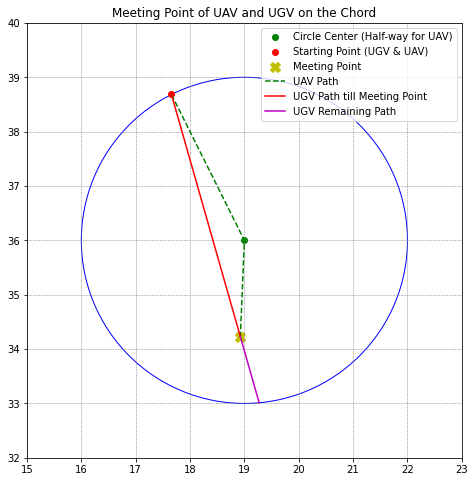

0
yes {3.92843310668247}


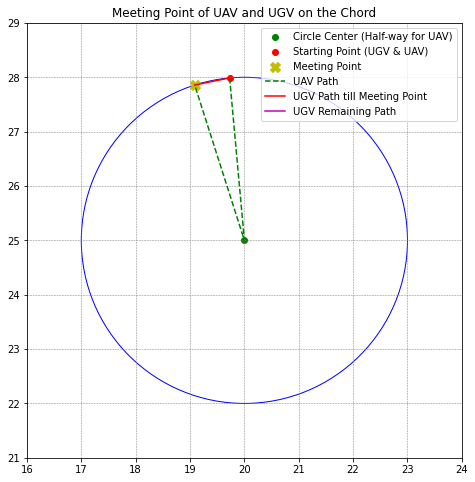

0.3229455831490736


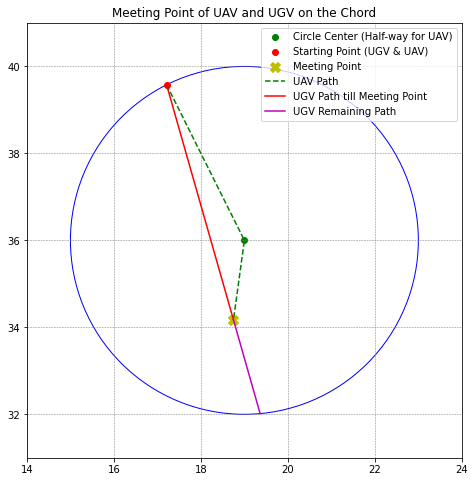

0
yes {3.92843310668247}


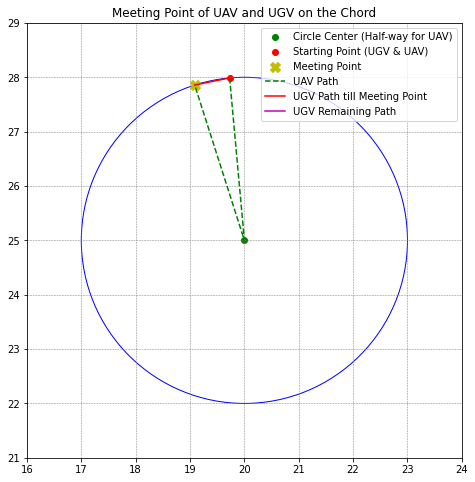

0.3229455831490736


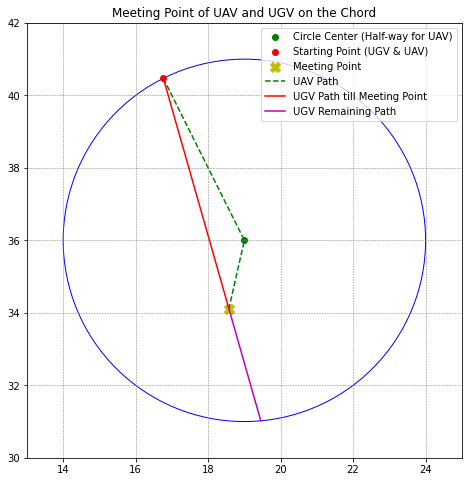

0
yes {3.92843310668247}


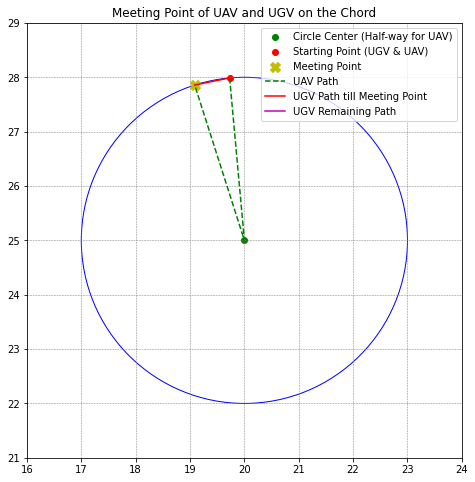

0.3229455831490736


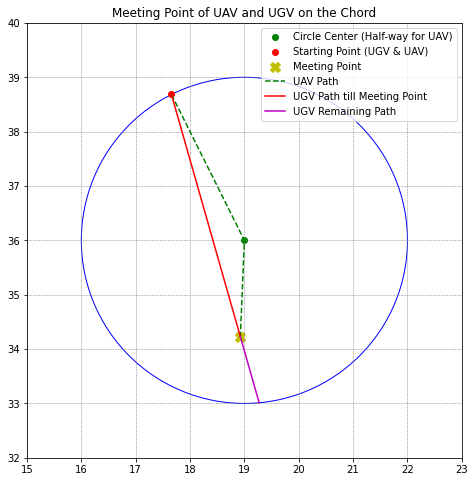

0
yes {4.894452397603633}


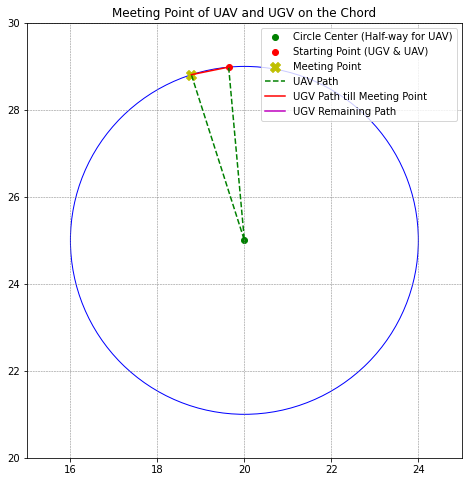

0.3750385553098759


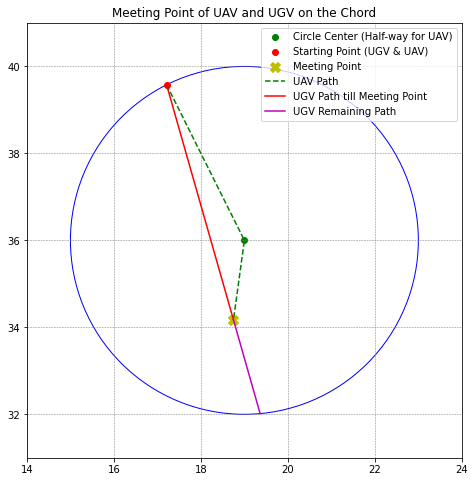

0
yes {4.894452397603633}


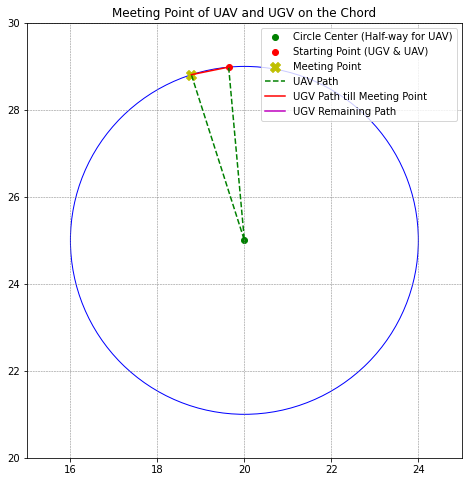

0.3750385553098759


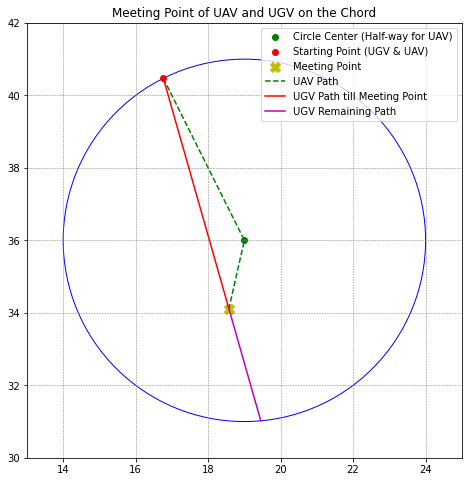

0
yes {4.894452397603633}


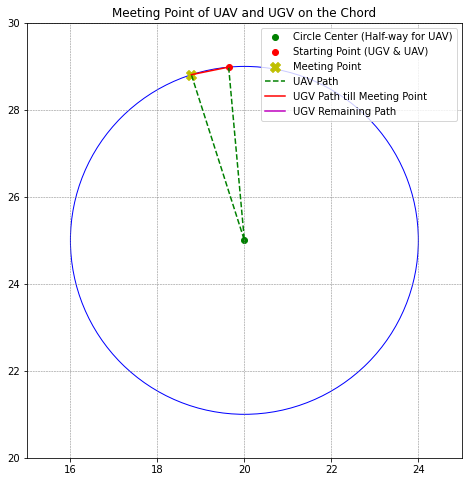

0.3750385553098759


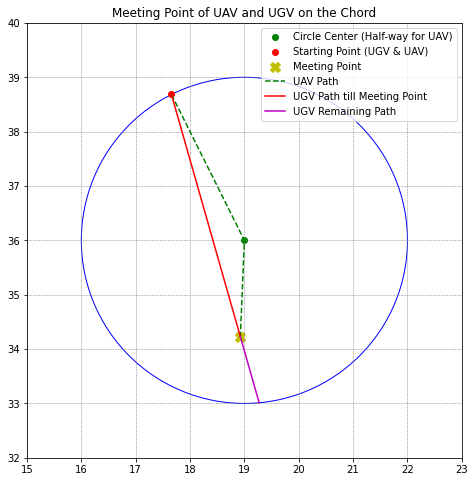

0
yes {5.884823349474303}


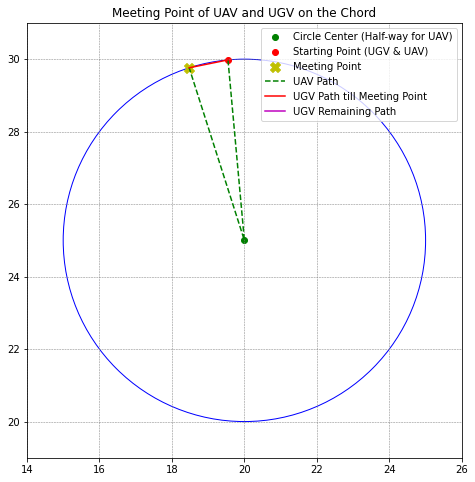

0.4271315274706779


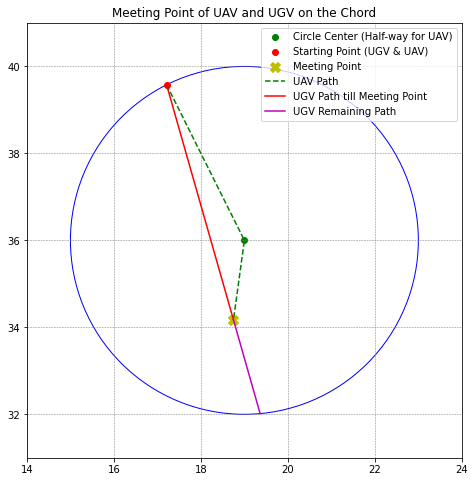

0
yes {5.884823349474303}


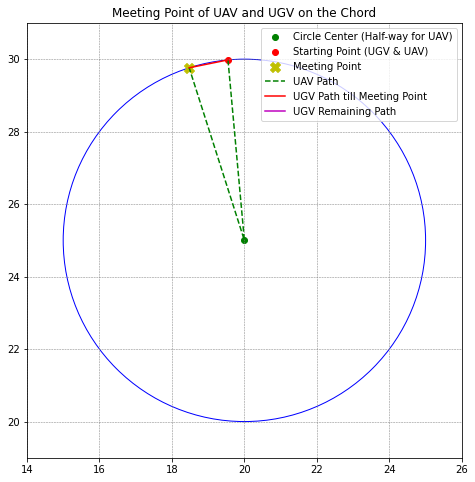

0.4271315274706779


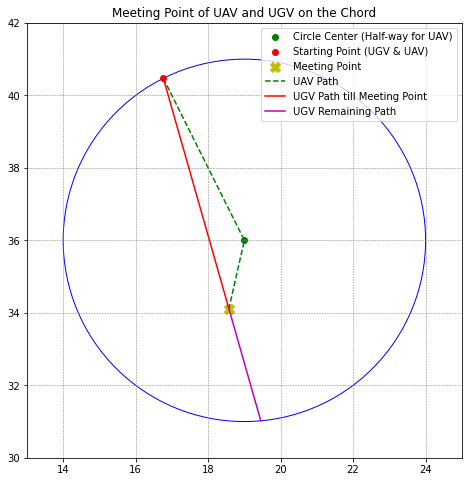

0
yes {5.884823349474303}


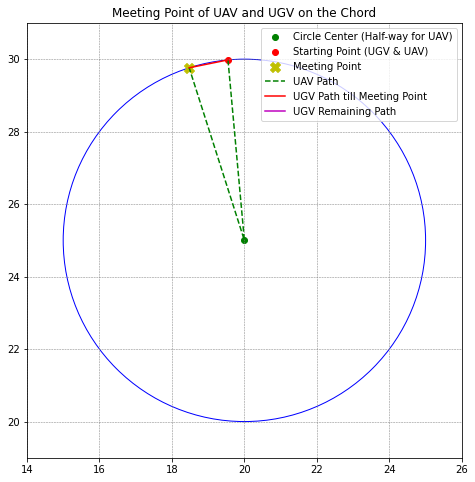

0.4271315274706779


In [67]:
def plot_solution(waypoints, plan_output, radii, plot_graph=True):
    UGVdistances = []
    UAV_total_distances = []
    
    # Create all possible permutations of radii for waypoints
    for radius_combination in product(radii, repeat=len(waypoints)-1):
        ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
        ordered_points.append(ordered_points[0])

        if plot_graph:
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.scatter(*zip(*ordered_points))
        
        UGV_path = [ordered_points[0]]
        UGV_outer_path = [ordered_points[0]]
        UGV_inter_path = []
        
        UAV_path = []
        UAV_distances = []
        UGV_inter_distances = []
        # UGV_outer_distances = []
        for i, point in enumerate(ordered_points[:-1]):
            if plot_graph:
                plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
            current_radius = radius_combination[i % len(radius_combination)]
            
            # Exclude the start and end points from circles
            if 0 < i < len(ordered_points) - 2:  
                if plot_graph:
                    
                    draw_circle(ax, point, current_radius)

                # calculate angle and chords for the current waypoint
                angle = angle_between_points(ordered_points[i-1], ordered_points[i])
                nextangle = angle_between_points(ordered_points[i], ordered_points[i+1])
                chord_start = point_on_circle(ordered_points[i], angle - np.pi , current_radius)
                chord_end = point_on_circle(ordered_points[i], nextangle , current_radius)
                UAV_path_segment = [chord_start, ordered_points[i], chord_end]
                UAV_path.extend(UAV_path_segment)
                
                UGV_inter_path.extend([chord_start, chord_end])
                UGV_inter_distances_segment = np.linalg.norm(np.array(chord_start) - np.array(chord_end))
                UAV_distance = sum(np.linalg.norm(np.array(UAV_path_segment[j]) - np.array(UAV_path_segment[j+1])) for j in range(len(UAV_path_segment) - 1))
                UAV_distances.append(UAV_distance)
                UGV_inter_distances.append(UGV_inter_distances_segment)
                
                # calculate the chord for the previous waypoint
                prev_radius = radius_combination[(i-1) % len(radius_combination)]
                prev_angle = angle_between_points(ordered_points[i - 2] if i > 1 else ordered_points[0], ordered_points[i-1])
                prev_chord_end = point_on_circle(ordered_points[i-1], prev_angle + np.pi / 2, prev_radius)


                # add the point on the current waypoint's circle that is closest to the previous waypoint
                if np.linalg.norm(np.array(chord_start) - np.array(prev_chord_end)) < np.linalg.norm(np.array(chord_end) - np.array(prev_chord_end)):
                    if plot_graph:
                        ax.plot(*zip(*[chord_start, chord_end]), 'r-')  # visualize the chord
                    UGV_path.extend([chord_start, chord_end])
                    final_meeting_point, final_wait_time = find_meeting_point_with_survey_final(ordered_points[i],current_radius, chord_start, chord_end, 15, 30, survey_time)
                    visualize_meeting_point_updated(ordered_points[i],current_radius,chord_start,chord_end, final_meeting_point)
                    print(final_wait_time)

                    # UGV_outer_path.extend([chord_start])
                else:
                    if plot_graph:
                        ax.plot(*zip(*[chord_end, chord_start]), 'r-')  # visualize the chord
                    UGV_path.extend([chord_end, chord_start])
                    final_meeting_point, final_wait_time = find_meeting_point_with_survey_final(ordered_points[i],current_radius, chord_end, chord_start, 15, 30, survey_time)
                    visualize_meeting_point_updated(ordered_points[i],current_radius,chord_start,chord_end, final_meeting_point)
                    print(final_wait_time)
                    # UGV_outer_path.extend([chord_end])

        UGV_path.append(ordered_points[-1])
        if plot_graph:
            ax.plot(*zip(*ordered_points), linestyle='-', marker='o')
        
        UGV_distance = sum(np.linalg.norm(np.array(UGV_path[i]) - np.array(UGV_path[i+1])) for i in range(len(UGV_path) - 1))
        grouped_outer_points = [(UGV_path[i], UGV_path[i+1]) for i in range(0, len(UGV_path)-1, 2)]
        grouped_outer_distances = [compute_distance(pair[0], pair[1]) for pair in grouped_outer_points]
        # formatted_distances = ["{:.2f}".format(distance) for distance in grouped_outer_distances]
        # print(f"Total UGV distance of new path for radii {radius_combination}: {UGV_distance:.2f}")
        # print(f"UAV path distances : {UAV_path}")
        # print(f"UGV outer distances : {format_list_to_decimal(grouped_outer_distances)} \n")
        
        UGVdistances.append(UGV_distance)
        UAV_total_distances.append(sum(UAV_distances))

        if plot_graph:
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title(f'TSP Solution, radii = {radius_combination}')
            plt.grid()
            plt.axis('equal')
            plt.show()
    
    return UGVdistances, UAV_total_distances, UGV_inter_distances, UAV_path, UGV_path

# Running the modified function again with plot_graph set to True
UGVdistances, UAV_total_distances, UGV_inter_distances, UAV_path,UGV_path= plot_solution(waypoints, plan_output, radii, plot_graph=False)



In [90]:
def plot_solution_combined(waypoints, plan_output, radii, speed_ugv, speed_uav, survey_time, plot_graph=True):
    UGVdistances = []
    UAV_total_distances = []
    
    # Create all possible permutations of radii for waypoints
    for radius_combination in product(radii, repeat=len(waypoints)-1):
        ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
        ordered_points.append(ordered_points[0])

        if plot_graph:
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.scatter(*zip(*ordered_points))
        UGV_outer_path=[]
        UGV_path = [ordered_points[0]]
        UGV_inter_path = []
        UAV_path = []
        UAV_distances = []
        UGV_inter_distances_withDorne = []
        UGV_inter_distance_withoutDrone = []
        for i, point in enumerate(ordered_points[:-1]):
            if plot_graph:
                plt.annotate(i, (point[0] + 0.5, point[1] + 0.5))
            current_radius = radius_combination[i % len(radius_combination)]
            
            # Exclude the start and end points from circles
            if 0 < i < len(ordered_points) - 2:
                
                # calculate angle and chords for the current waypoint
                angle = angle_between_points(ordered_points[i-1], ordered_points[i])
                nextangle = angle_between_points(ordered_points[i], ordered_points[i+1])
                chord_start = point_on_circle(ordered_points[i], angle - np.pi, current_radius)
                chord_end = point_on_circle(ordered_points[i], nextangle, current_radius)
                
                # calculate meeting point
                final_meeting_point, final_wait_time = find_meeting_point_with_survey_final(ordered_points[i],current_radius, chord_start, chord_end, speed_ugv, speed_uav, survey_time)
                
                # Visualize without creating a new figure
                circle = plt.Circle(point, current_radius, color='b', fill=False)
                ax.add_artist(circle)
                plt.scatter(point[0],point[1], color='g', label='Circle Center (Half-way for UAV)')
                plt.scatter(chord_start[0],chord_start[1], color='r', label='Starting Point (UGV & UAV)')
                UGV_outer_path.extend([chord_start])
                # ax.plot(*ordered_points[i],*chord_start,linestyle='-', marker='o')
                ax.plot([chord_start[0], point[0], final_meeting_point[0]], [chord_start[1], point[1], final_meeting_point[1]], 'g--')
                ax.plot([chord_start[0], final_meeting_point[0]], [chord_start[1], final_meeting_point[1]], 'r-')
                ax.plot([final_meeting_point[0],chord_end[0] ], [final_meeting_point[1], chord_end[1]], 'm-')
                ax.scatter(final_meeting_point[0], final_meeting_point[1], color='y', marker='X', s=100,label='Meeting Point')
                
                print(f"Wait time: {final_wait_time:.2f}")
                
                UAV_path.extend([chord_start, ordered_points[i], final_meeting_point])
                UGV_inter_path.extend([chord_start, final_meeting_point])
                
                UAV_distance_segment = sum(np.linalg.norm(np.array(UAV_path[j]) - np.array(UAV_path[j+1])) for j in range(len(UAV_path) - 1))
                UGV_inter_distance_segment = np.linalg.norm(np.array(chord_start) - np.array(final_meeting_point))
                UAV_distances.append(UAV_distance_segment)
                UGV_inter_distances.append(UGV_inter_distance_segment)
                
                UGV_path.append(final_meeting_point)
        
        UGV_path.append(ordered_points[-1])
        # if plot_graph:
        #     ax.plot(*zip(*ordered_points), linestyle='b-', marker='o')
        
        UGV_distance = sum(np.linalg.norm(np.array(UGV_path[i]) - np.array(UGV_path[i+1])) for i in range(len(UGV_path) - 1))
        
        UGVdistances.append(UGV_distance)
        UAV_total_distances.append(sum(UAV_distances))

        if plot_graph:
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title(f'TSP Solution, radii = {radius_combination}')
            plt.grid()
            plt.axis('equal')
            plt.show()
    
    return UGVdistances, UAV_total_distances, UGV_inter_distances, UAV_path, UGV_path



# UGVdistances, UAV_total_distances, UGV_inter_distances, UAV_path, UGV_path = plot_solution_combined(waypoints, plan_output, radii, speed_ugv, speed_uav, survey_time, plot_graph=True)


Wait time: 0.00
Wait time: 0.30


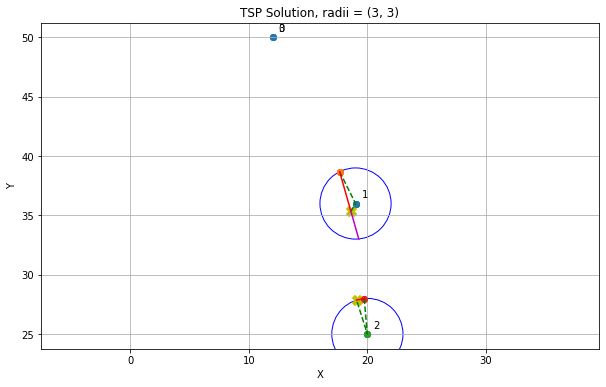

Wait time: 0.00
Wait time: 0.30


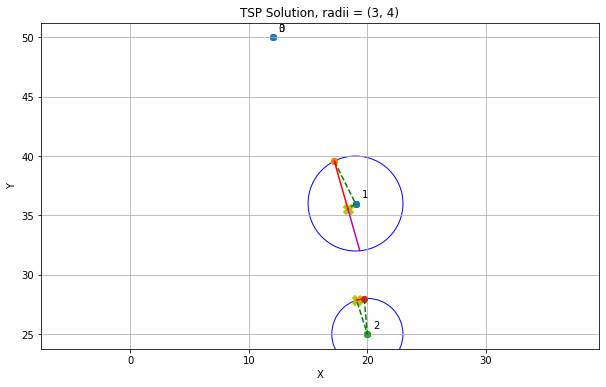

Wait time: 0.00
Wait time: 0.30


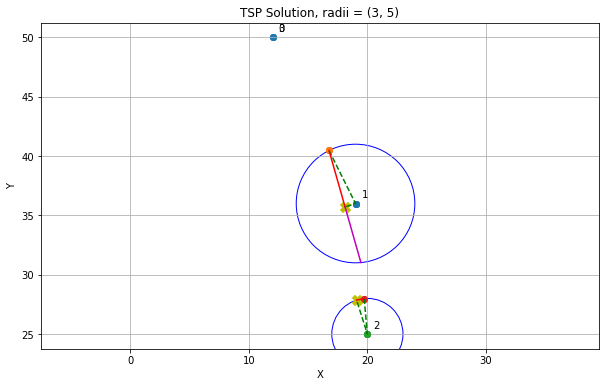

Wait time: 0.00
Wait time: 0.35


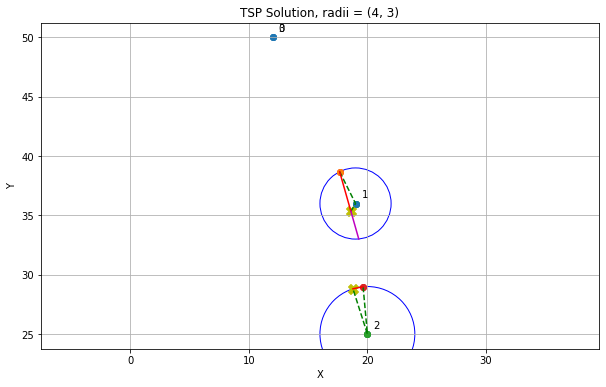

Wait time: 0.00
Wait time: 0.35


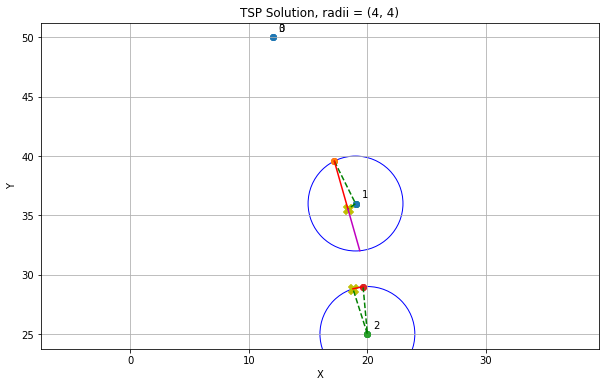

Wait time: 0.00
Wait time: 0.35


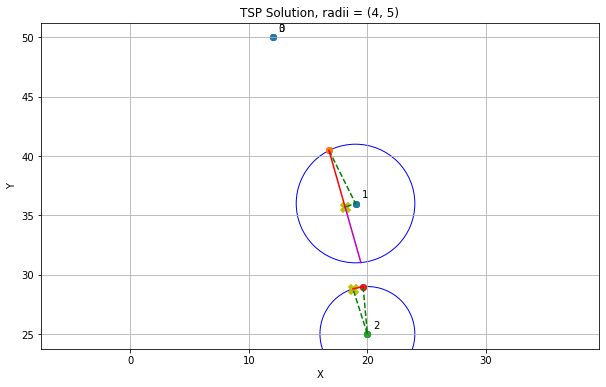

Wait time: 0.00
Wait time: 0.39


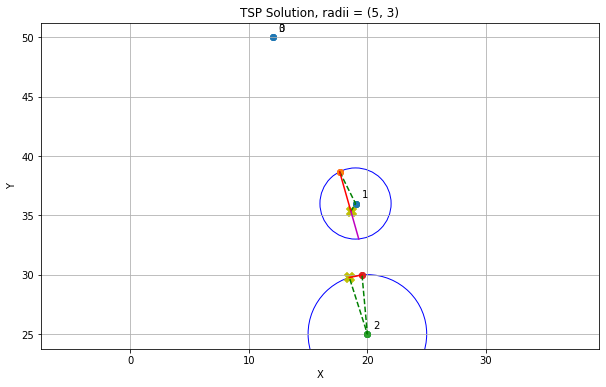

Wait time: 0.00
Wait time: 0.39


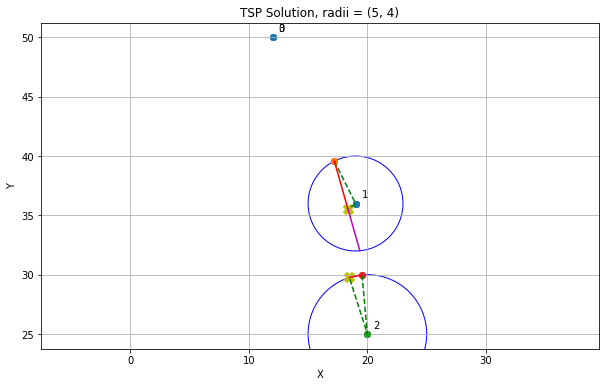

Wait time: 0.00
Wait time: 0.39


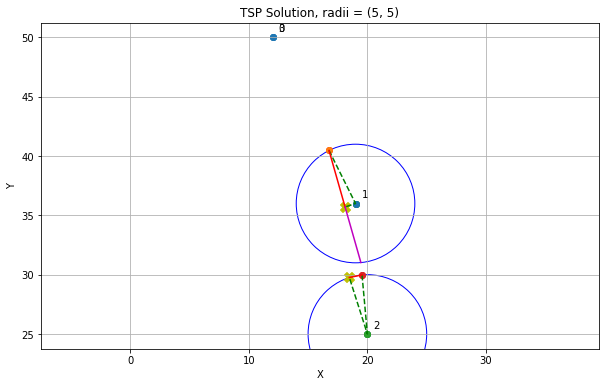

In [91]:
UGVdistances, UAV_total_distances, UGV_inter_distances, UAV_path,UGV_path= plot_solution_combined(waypoints, plan_output, radii,speed_ugv, speed_uav, survey_time, plot_graph=True)


In [55]:
UGVdistances

[48.86750373782721]

In [56]:
UAV_path

[(18.105572809000083, 37.78885438199983),
 (19, 36),
 (18.853280952007978, 35.16047746939173),
 (19.81892850791496, 26.991786412935408),
 (20, 25),
 (19.39044854579243, 26.904848294398647)]

In [15]:
# Grouping the UGV_path by 2

grouped_outer_points = [(UGV_path[i], UGV_path[i+1]) for i in range(0, len(UGV_path)-1, 2)]
# Calculating the distances for each grouped pair
grouped_distances = [compute_distance(pair[0], pair[1]) for pair in grouped_outer_points]
grouped_distances



[5.8959621805693025, 0.874421670351862]

In [22]:
format_list_to_decimal(UGV_inter_distances) #Travle without drone

['7.86', '0.87']

Total battery cap of the system: 515,000 Mha 
UGV speed: 10 km/h
UAV Speed: 30 km/h

Discharge speed: UGV:
With drone: 1000mha/km
without drone: 800mha/km
charging cost: 1000mha/km

max range of the UAV: 12 km
total charge of UAV: 15,000 mha
Discharge speed of UAV:
 Travel: 1250 mha/km
 Service : 2500 mha (1/6 mins) 
	
Charging rate: 1000 mha/km (1.5h)

In [23]:
def get_ugv_energy(total_charge, travel_with_drone_mah, travel_without_drone_mah, drone_charge_mah):
    """
    Compute the remaining UGV energy based on the total charge and mAh used.

    Parameters:
    - total_charge: The total available charge in mAh.
    - travel_with_drone_mah: The mAh used for traveling with the drone.
    - travel_without_drone_mah: The mAh used for traveling without the drone.
    - drone_charge_mah: The mAh used to charge the drone.

    Returns:
    - remaining_energy: The remaining UGV energy in mAh.
    """

    used_charge = travel_with_drone_mah + travel_without_drone_mah + drone_charge_mah
    remaining_energy = total_charge - used_charge

    # Ensure that the remaining energy is not negative
    if remaining_energy < 0:
        print("Error: Used more energy than available!")
        return 0

    return remaining_energy
# Example usage:
total_charge = 500000  # 10000 mAh
travel_with_drone_mah = 1000*
travel_without_drone_mah = 2000
drone_charge_mah = 2500

remaining_energy = get_ugv_energy(total_charge, travel_with_drone_mah, travel_without_drone_mah, drone_charge_mah)
print(f"Remaining UGV energy: {remaining_energy} mAh")

Remaining UGV energy: 494500 mAh
